<a href="https://colab.research.google.com/github/yahia-kplr/Machine-Learning/blob/main/frozen_desserts_forecasting_LSTM_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><div align="center">**Forecasting Industrial Production**</div></h1>


---

**<h2>Problem Statement: </h2>** 

- To forecast the manufacturing of Ice Cream and Frozen Dessert provided by a previous production history.

</br>

**Data used**: [Click here to download](https://fred.stlouisfed.org/series/IPN31152N) [592 entries, from 1972-01-01 to 2021-04-01]
</br>

***Keywords:*** *RNN, Timeseries Generator, LSTM*

---

**<h2>Project Planning :</h2>** 


### **1. Data Understanding**
- **Imports -** 
  - Contains all the imports necessary for reading data, visualizations and model buiding and evaluating.
- **Getting Data -** 
  - Reading the csv, and infering the dates from data.
- **Exploring Data -** 
  - Understanding the nature of the data .info() and graphs
  - Obtaining the number of years and months present.


### **2. Data Preparation**
- **Train Test Split -** 
  - Splitting data in to train and test data.
  - Visualizing the train and test data
- **Scaling Data -** 
  - Scaling train and test set using a MinMax Scaler.


### **3. Building Train and Test Generators**
- Creating a Time series generator for train data and test data.
- Understand the working of a created generator (train_gen)


### **4. Model Building**
- Creating a Sequential Long Short-Term Memory (LSTM) *RNN* model.
- Compiling and Fitting the created model with *Early Stopping* and checking the model summary


### **4. Evaluation**
- **Training and Validation Losses -** 
  - Visualising training loss and validation loss.
- **Predictions -** 
  - Predicting the test data and plotting it against true values.
  - Evaluation of model with RMSE and SI.

### **5. Forecasting** 
  - Building a complete model with accepted parameters on whole dataset without splitting.
  - Forecasting the manufacturing for future 12 months and visualizing it.

---

Solution by     : **Aditya Karanth**.

GitHub Profile  : https://github.com/Aditya-Karanth

Kaggle Profile  : https://www.kaggle.com/adityakaranth

LinkedIn Profile: https://www.linkedin.com/in/u-aditya-karanth-2206/

# 1.**Data Understanding**
---

## **Imports**

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import os

# Visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (15,8)  

# Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation
from sklearn.metrics import mean_squared_error

## **Getting Data**

In [2]:
df = pd.read_csv('IPN31152N.csv') # Download the dataset from the above provided link
df.head()

DATE  IPN31152N
0  1972-01-01    60.1520
1  1972-02-01    67.2729
2  1972-03-01    74.4702
3  1972-04-01    78.3596
4  1972-05-01    85.0323

In [3]:
df['DATE'].dtype

dtype('O')

In [4]:
# Making Date column as index and dates as Datetime objects
df = pd.read_csv('IPN31152N.csv', index_col='DATE', parse_dates=True)
df

IPN31152N
DATE                 
1972-01-01    60.1520
1972-02-01    67.2729
1972-03-01    74.4702
1972-04-01    78.3596
1972-05-01    85.0323
...               ...
2022-04-01   111.9315
2022-05-01   108.8993
2022-06-01   116.4000
2022-07-01   109.1060
2022-08-01   108.9912

[608 rows x 1 columns]

## **Exploring Data**
---

In [5]:
df.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', name='DATE', length=608, freq=None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 608 entries, 1972-01-01 to 2022-08-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  608 non-null    float64
dtypes: float64(1)
memory usage: 9.5 KB


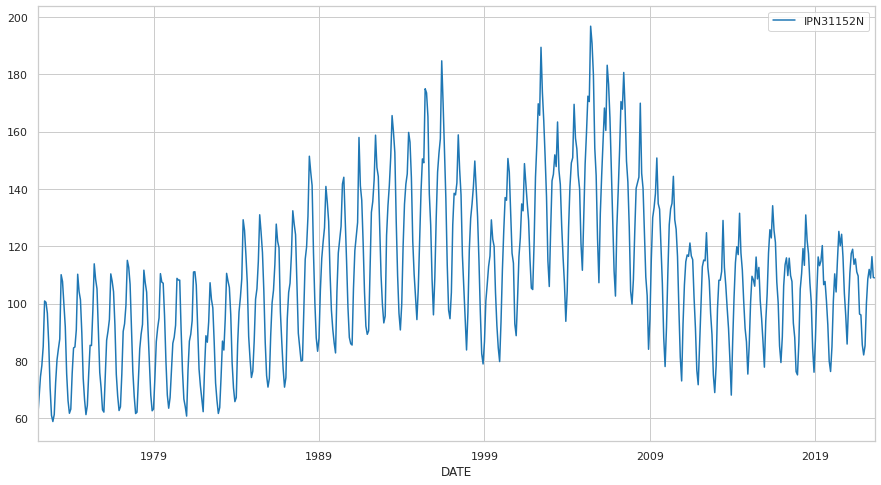

In [7]:
df.plot()

In [8]:
print(f'Number of months present - {len(df)}')
print(f'Number of years present - {len(df)/12}') # as each month has one observation

Number of months present - 608
Number of years present - 50.666666666666664


In [9]:
df.tail().index # only 4 months of data from the year 2020

DatetimeIndex(['2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

# 2.**Data Preparation**
---

## **Train Test Split**

In [10]:
test_len = 18 # Considering last 18 months as test set.

ind = len(df) - test_len
train = df[:ind] # 1972-01 to 2019-10
test = df[ind:] # 2019-11 to 2021-04

print(f'Length of train set: {len(train)}')
print(f'Length of test set: {len(test)}')

Length of train set: 590
Length of test set: 18


In [11]:
# Train data
train

IPN31152N
DATE                 
1972-01-01    60.1520
1972-02-01    67.2729
1972-03-01    74.4702
1972-04-01    78.3596
1972-05-01    85.0323
...               ...
2020-10-01   103.5837
2020-11-01    95.8137
2020-12-01    85.8814
2021-01-01    99.3509
2021-02-01   110.6275

[590 rows x 1 columns]

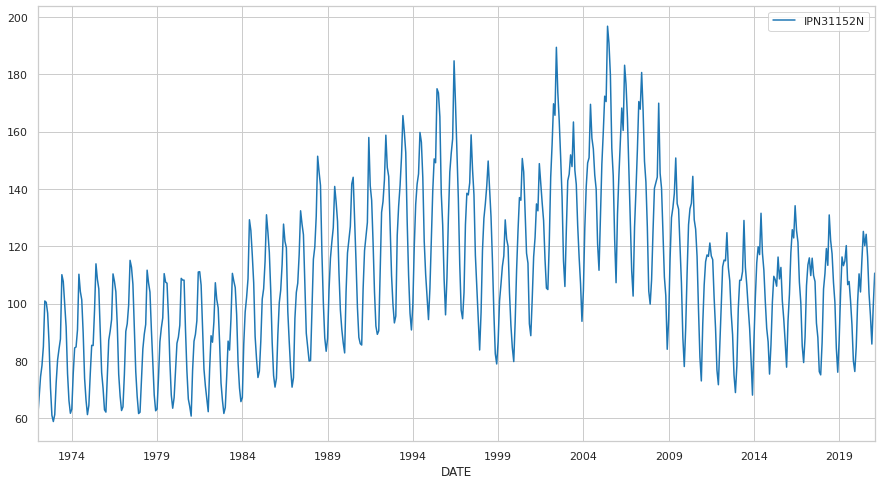

In [12]:
# Train Data plot
train.plot()

In [13]:
# Test Data
test

IPN31152N
DATE                 
2021-03-01   117.5007
2021-04-01   118.9769
2021-05-01   113.6948
2021-06-01   115.5991
2021-07-01   111.0626
2021-08-01   109.6379
2021-09-01    96.3444
2021-10-01    96.0669
2021-11-01    85.6469
2021-12-01    82.0899
2022-01-01    85.2764
2022-02-01   100.1325
2022-03-01   108.6138
2022-04-01   111.9315
2022-05-01   108.8993
2022-06-01   116.4000
2022-07-01   109.1060
2022-08-01   108.9912

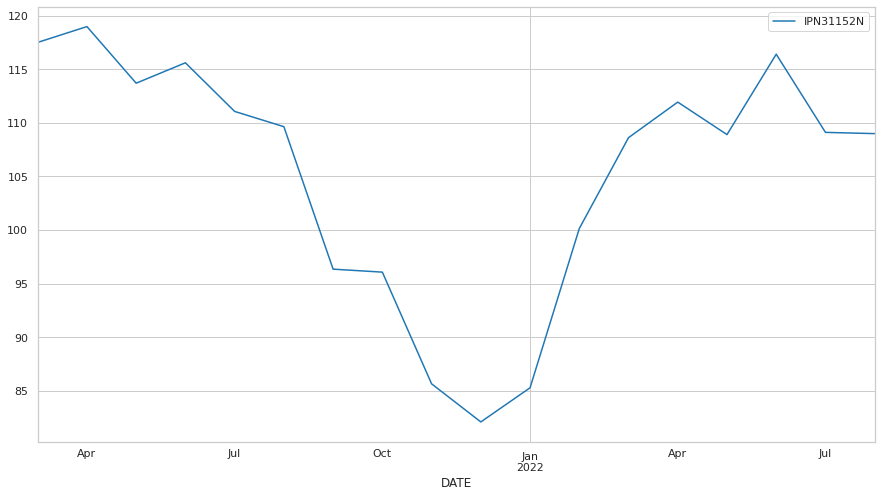

In [14]:
# Test Data Plot
test.plot()


## **Scaling Data**

In [15]:
# Scaling Test and Train Data
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

## **Building Train and Test Generators**

In [16]:
inp_len = 12 # Generator takes 12 points as X_train and
out_len = 1 # takes next point as y_train
n_feat = 1

# Train Generator
train_gen = TimeseriesGenerator(data = train_sc,
                                targets = train_sc,
                                length = inp_len,
                                batch_size = out_len)

# Test Generator
test_gen = TimeseriesGenerator(data = test_sc,
                                targets = test_sc,
                                length = inp_len,
                                batch_size = out_len)

In [17]:
print(f'Length of Train set: {len(train)}')
print(f'Length of Train Generator:{len(train_gen)}') # Note: Generator will exclude last "inp_len (12)" points.
print(f'Length of Test set: {len(test)}')
print(f'Length of Test Generator:{len(test_gen)}')

Length of Train set: 590
Length of Train Generator:578
Length of Test set: 18
Length of Test Generator:6


> Understanding a Generator (train_gen)

In [18]:
X, y = train_gen[0] # First gen object
print(f'First train_gen object input (X): {len(X[0])}\n {X}\n') # 'inp_len' data points
print(f'First train_gen object output (y): {len(y[0])}\n {y}') # 'out_len' data points

First train_gen object input (X): 12
 [[[0.00946792]
  [0.06107946]
  [0.11324473]
  [0.14143469]
  [0.18979772]
  [0.30491313]
  [0.30149792]
  [0.274119  ]
  [0.19733843]
  [0.08531424]
  [0.01561414]
  [0.        ]]]

First train_gen object output (y): 1
 [[0.01773922]]


In [19]:
# Actual scaled train set
train_sc[:inp_len+out_len]

array([[0.00946792],
       [0.06107946],
       [0.11324473],
       [0.14143469],
       [0.18979772],
       [0.30491313],
       [0.30149792],
       [0.274119  ],
       [0.19733843],
       [0.08531424],
       [0.01561414],
       [0.        ],
       [0.01773922]])

# 3.**Model Building**
---

In [20]:
# Creating Model
model = Sequential()

# Input layer
model.add(LSTM(150, activation='relu', input_shape=(inp_len, n_feat))) #LSTM RNN
model.add(Dropout(0.15))
# Output layer
model.add(Dense(1))

In [21]:
# Compile the created model
model.compile(optimizer='adam',
              loss='mse')

# Monitor the "validation_loss" and 
# when "min" value is reached during training, wait for "2" epochs and stop training.
early_stop = EarlyStopping(monitor='val_loss',
                           verbose=1,
                           mode='min',
                           patience=2)

# Fit the model to the generators created.
model.fit_generator(train_gen,
                    validation_data = test_gen,
                    epochs = 10,
                    callbacks = [early_stop])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


578/578 [==============================] - 16s 21ms/step - loss: 0.0243 - val_loss: 0.0032
Epoch 2/10
578/578 [==============================] - 12s 21ms/step - loss: 0.0103 - val_loss: 0.0080
Epoch 3/10
578/578 [==============================] - 12s 20ms/step - loss: 0.0075 - val_loss: 0.0027
Epoch 4/10
578/578 [==============================] - 12s 21ms/step - loss: 0.0060 - val_loss: 6.6982e-04
Epoch 5/10
578/578 [==============================] - 13s 22ms/step - loss: 0.0060 - val_loss: 5.0446e-04
Epoch 6/10
578/578 [==============================] - 12s 21ms/step - loss: 0.0066 - val_loss: 9.2882e-04
Epoch 7/10
578/578 [==============================] - 12s 21ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 7: early stopping


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


#4.**Evaluation**
---


## **Training and Validation Losses**

In [23]:
# New dataframe "losses" with model.history.history data
losses = pd.DataFrame(model.history.history)
losses

loss  val_loss
0  0.024253  0.003152
1  0.010343  0.007969
2  0.007460  0.002676
3  0.005983  0.000670
4  0.006047  0.000504
5  0.006573  0.000929
6  0.005118  0.001480

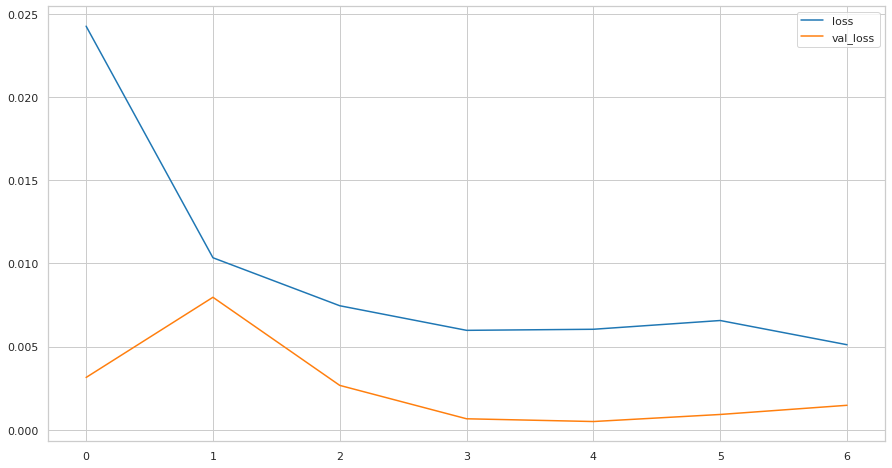

In [24]:
# Plot training loss v/s validation loss
losses[['loss','val_loss']].plot()

## **Predictions**

Idea here for the predictions is,
first, we predict the last batch that was not included in train_gen, 
then first row is discarded and predicted values are added at last as illustrated below, and this repeats till the length of testset.
>

> ```
1. [x1 x2 x3 x4 x5] -> M -> [y1] 
2. [x2 x3 x4 x5 y1] -> M -> [y2]
3. [x3 x4 x5 y1 y2] -> M -> [y3] 
          .
          .
          .     
n. [y1 y2 y3 y4 y5] -> M -> [y6] # Predicting on Predictions
```




In [25]:
y_pred = [] 

train_sc_lastrows = train_sc[-inp_len:] # Last row of scaled train (excluded by train_gen)
batch = train_sc_lastrows.reshape((1, inp_len, n_feat)) # Reshape (1, 12, 1)

for _ in range(len(test)):
  pred = model.predict(batch) # Predict 
  y_pred.append(pred[0]) # Append the 'prediction' to empty list
  batch = np.append(batch[:,1:,:],[pred],axis=1) # Remove first element in 'batch', add prediction at end, and Repeat predictions.

1/1 [==============================] - 0s 17ms/step


In [26]:
y_pred = sc.inverse_transform(y_pred) # Remove scaling
test['y_pred'] = y_pred # Adding the predictions to test data for comparision

test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


IPN31152N      y_pred
DATE                             
2021-03-01   117.5007  107.962944
2021-04-01   118.9769  111.682647
2021-05-01   113.6948  120.955687
2021-06-01   115.5991  125.866563
2021-07-01   111.0626  127.322958
2021-08-01   109.6379  126.691558
2021-09-01    96.3444  118.717939
2021-10-01    96.0669  107.694045
2021-11-01    85.6469   99.146246
2021-12-01    82.0899   92.941181
2022-01-01    85.2764  100.194425
2022-02-01   100.1325  105.282521
2022-03-01   108.6138  108.284573
2022-04-01   111.9315  115.786833
2022-05-01   108.8993  123.837549
2022-06-01   116.4000  129.204710
2022-07-01   109.1060  131.672656
2022-08-01   108.9912  129.936711

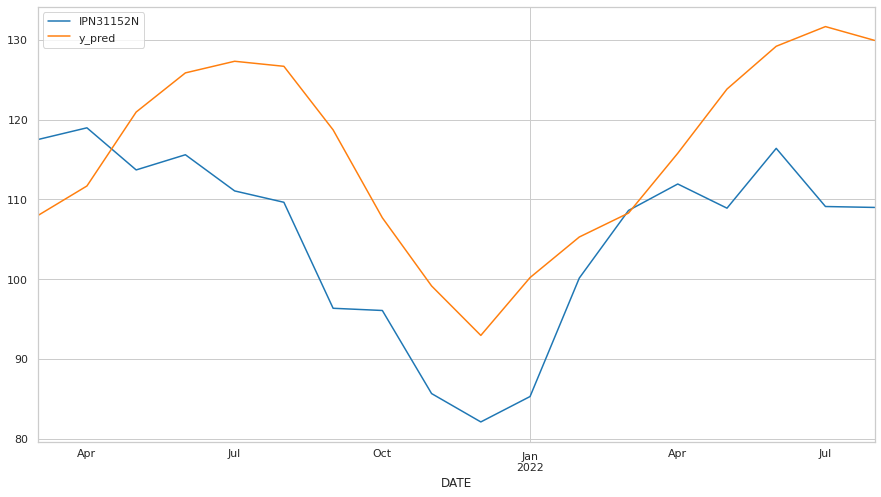

In [27]:
test.plot() # Original Test Data vs Predictions

# Note: LSTM produce different results on each execution

In [28]:
rmse = mean_squared_error(test['IPN31152N'],test['y_pred'])**0.5
df_mean = df['IPN31152N'].mean()
print(f'RMSE : {rmse}')
print(f'Mean : {df_mean}')
print(f'Scatter Index: {rmse/df_mean}') # Less SI -> Better Model

RMSE : 13.72834354273435
Mean : 109.85446184210525
Scatter Index: 0.12496846566383635


# 5.**Forecasting**
---

Accepting the preceding model's performance, Creating a new model with same parameters and fitting on all the available data for forecasting next 12 months.

In [33]:
scaler = MinMaxScaler() 
sc_df = scaler.fit_transform(df) # Scaling complete data

# Generator
gen = TimeseriesGenerator(sc_df,  
                          sc_df,
                          length=inp_len,
                          batch_size = out_len)

# Model
forecaster = Sequential()
forecaster.add(LSTM(150, activation='relu', input_shape=(inp_len, n_feat)))
forecaster.add(Dropout(0.15))
forecaster.add(Dense(1))

# Compile the created model
forecaster.compile(optimizer='adam', loss='mse')

# Fit the model
forecaster.fit_generator(gen, epochs = 5)


interval = 12 # Forecasting Period
forecast = []
sc_df_lastrows = sc_df[-inp_len:]
batch1 = sc_df_lastrows.reshape((1, inp_len, n_feat))
for _ in range(interval):
  pred1 = forecaster.predict(batch1)
  forecast.append(pred1[0]) 
  batch1 = np.append(batch1[:,1:,:],[pred1],axis=1)

forecast = scaler.inverse_transform(forecast)

# Creating new DataFrame with Index of future dates
fc_index = pd.date_range(start='2022-08-01', periods=interval, freq='MS')
fc_df = pd.DataFrame(forecast, index=fc_index, columns=['Forecast'])
fc_df # Forecast Dataframe

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


596/596 [==============================] - 13s 20ms/step - loss: 0.0191
Epoch 2/5
596/596 [==============================] - 12s 20ms/step - loss: 0.0099
Epoch 3/5
596/596 [==============================] - 12s 20ms/step - loss: 0.0072
Epoch 4/5
596/596 [==============================] - 12s 20ms/step - loss: 0.0064
Epoch 5/5
1/1 [==============================] - 0s 23ms/step


Forecast
2022-08-01  103.684242
2022-09-01   99.190934
2022-10-01   92.307854
2022-11-01   89.565277
2022-12-01   93.494516
2023-01-01  102.881566
2023-02-01  109.573164
2023-03-01  112.980876
2023-04-01  115.785998
2023-05-01  117.244084
2023-06-01  114.980547
2023-07-01  112.665504

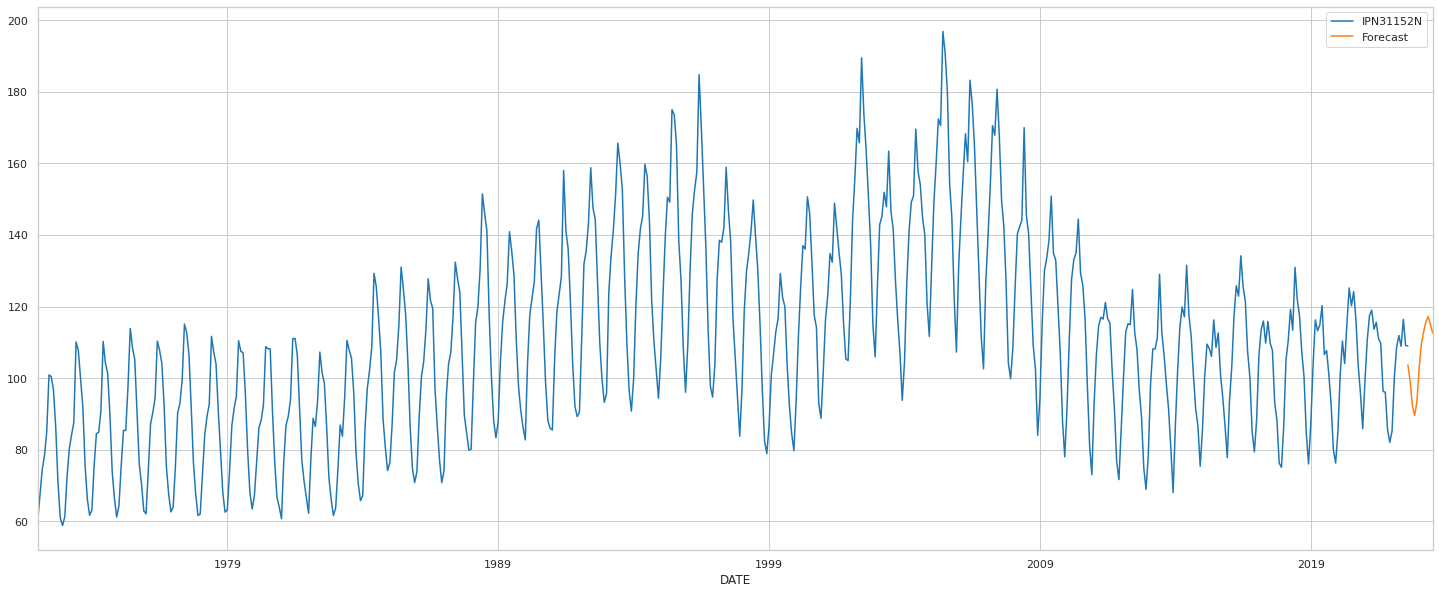

In [34]:
# Complete Graph with Forecasting
ax = df.plot()
fc_df.plot(ax=ax, figsize=(25,10))

(588.0, 642.0)

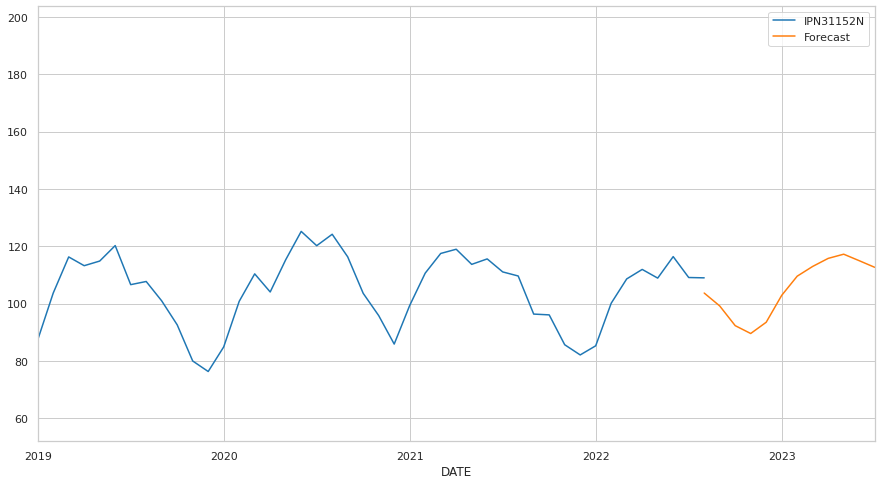

In [36]:
# Forecasting Graph (cropped)
ax = df.plot()
fc_df.plot(ax=ax)
plt.xlim('2019-01-01', fc_index[-1])